# Analytics for Unstructured Data Assignment 2
## Building a Crowdsourced Recommender System

Team members:
- Marcus Martinez
- Marifer Martinez-Garcia
- Femke Munting
- Alex Schmelzeis
- Milan Vaghani
- Kennedy Zapalac

In [34]:
# # pip install undected_chromedriver #run this if you are using it for the first time
# Importing modules related to web automation (Selenium)
#from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
#from selenium.webdriver.common.by import By
#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC
#from selenium.webdriver.common.action_chains import ActionChains
#from selenium.common.exceptions import TimeoutException

# Uncomment the following if using undetected_chromedriver for scraping
# import undetected_chromedriver as uc

# Importing standard libraries
import time
import string
import io
import csv
import re
import shutil
import random
from tempfile import NamedTemporaryFile
import decimal
from collections import Counter, defaultdict
import itertools
from itertools import combinations
import operator

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and manifold learning
from sklearn import manifold

# Natural language processing (NLP)
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter, defaultdict
import re
import string

# Machine learning and text processing
from sklearn import manifold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Scraping
We have commented out the scraping code for now, but you can run it if you remove the comments.

## Scraping for Beer Advocate

In [35]:
# # Initialize the undetected Chrome driver with options
# options = uc.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)

# # Open the BeerAdvocate top-rated beers page
# driver.get('https://www.beeradvocate.com/beer/top-rated/')

# wait = WebDriverWait(driver, 10)

# # Dictionary to store beer data
# beer_data = {}

# # Loop through each beer listed on the page (250 beers)
# for i in range(2, 252):  # Beer list starts from row 2 and goes up to 251
#     try:
#         # Locate the beer name and URL
#         beer_link = wait.until(EC.presence_of_element_located(
#             (By.XPATH, f'//div[@id="ba-content"]/table/tbody/tr[{i}]/td[2]/a')))
#         beer_name = beer_link.text
#         beer_url = beer_link.get_attribute('href')
#         # Store the name and URL in the dictionary
#         beer_data[beer_name] = beer_url

#     except Exception as e:
#         print(f"Error in processing beer {i}: {e}")
#         continue
# driver.quit()

In [36]:
# # Initialize the undetected Chrome driver with options
# options = uc.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)
# # Open the first beer's page
# comments_file = pd.DataFrame( columns = ['Beer','Rating','Review'])

# for key,value in beer_data.items():
#         driver.get(value)
#         reviews = driver.find_elements(By.XPATH,'//div[@id="rating_fullview_content_2"]')
#         for review in reviews[:25]:
#             try:
#                 review_cmmnts = rep5 = review.find_element(By.XPATH,'.//div').text
#                 rating = review.find_element(By.XPATH,'.//span[2]').text
#                 review_cmmnts = review_cmmnts.replace('rDev',"")
#                 k = pd.DataFrame({'Beer': [key], 'Rating': [rating], 'Review': [review_cmmnts]})
#                 comments_file = pd.concat([comments_file, k], ignore_index=True)
#             except:
#                 pass
# driver.quit()

## Scraping for Rate Beer

In [37]:
# # Initialize undetected Chrome driver with options
# options = webdriver.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)

# # Open the BeerAdvocate top-rated beers page
# driver.get('https://www.ratebeer.com/top-beers')

# wait = WebDriverWait(driver, 10)

# # Dictionary to store beer data
# beer_data = {}

# # Wait for the page to load (use dynamic waiting instead of time.sleep)
# time.sleep(5)

# # Loop through each beer listed on the page (usually 50-250 beers)
# for i in range(1, 51):  # Adjust the range based on how many items are loaded
#     try:
#         # Locate the beer name and URL using XPath
#         beer_link = wait.until(EC.presence_of_element_located(
#             (By.XPATH, f'//*[@id="root"]/div[2]/div[2]/div/div/div/div/div/section[2]/div[2]/div/div/div[2]/div[{i}]/div[2]/a/div[1]')))

#         # Get the beer name
#         beer_name = beer_link.text

#         # Get the beer URL
#         beer_url = beer_link.find_element(By.XPATH, '..').get_attribute('href')

#         # Store the name and URL in the dictionary
#         beer_data[beer_name] = beer_url

#     except Exception as e:
#         print(f"Error in processing beer {i}: {e}")
#         continue

# driver.quit()

In [38]:
# # Initialize the undetected Chrome driver with options
# options = uc.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)

# # Create a DataFrame to store beer reviews

# # Iterate over the beer_data dictionary
# for beer_name, beer_url in beer_data.items():
#     driver.get(beer_url)

#     # Wait for the page to load
#     time.sleep(2)  # You may adjust this wait time or implement a better waiting strategy

#     # Loop through the first 15 reviews
#     for i in range(1, 16):
#         try:
#             # Get the review comment
#             review_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[2]/div[1]/div/div[1]/div'
#             review_comment = driver.find_element(By.XPATH, review_xpath).text

#             # Get the rating
#             rating_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[1]/div[2]/div[2]/div[2]/span[1]'
#             rating = driver.find_element(By.XPATH, rating_xpath).text

#             # Store the data in the DataFrame
#             k = pd.DataFrame({'Beer': [beer_name], 'Rating': [rating], 'Review': [review_comment]})
#             comments_file = pd.concat([comments_file, k], ignore_index=True)

#         except Exception as e:
#             continue

# driver.quit()

In [39]:
# comments_file.to_csv('data/beer_reviews.csv', index=False)

Text(0.5, 1.0, 'Distribution of Review Counts')

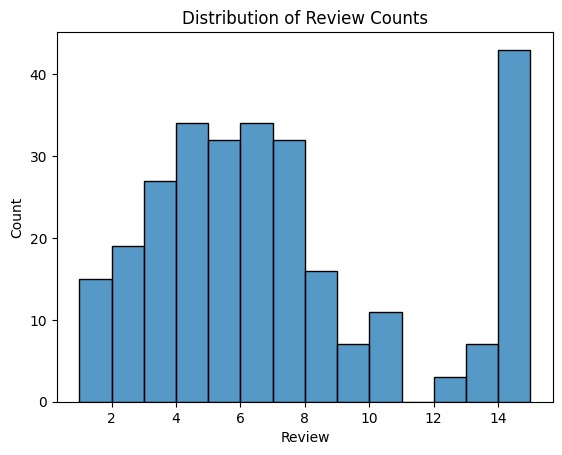

In [40]:
df = pd.read_csv("data/beer_reviews.csv")

reviews = df.groupby(["Beer"])["Review"].count()
# The max number of reviews for one beer is 15, the min is 1

df.groupby(["Beer"])["Review"].count().median()
# Mean count is 6; maybe we should cut off all beers that have less than three reviews?

# Display frequency of reviews

sns.histplot(reviews, binwidth = 1)
plt.title("Distribution of Review Counts")

In [41]:
more_than_3 = df.groupby(["Beer"])["Review"].count()
more_than_3 = more_than_3[more_than_3 >= 5]
more_than_3 = more_than_3.reset_index()

reduced_df = df[df["Beer"].isin(list(more_than_3["Beer"]))]
len(reduced_df["Beer"].unique())
reduced_df.to_csv("data/reduced_length.csv", index = False)
#len(reduced_df)

Should we include a more detailed overview of the dataset?

# Task B: Beer Attributes

**Use raw word frequneices or post frequenices? Used post frequencies**

In [42]:
# raw word frequencies
# Download stopwords from the NLTK package
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Input and output filenames
input_filename = 'data/reduced_length.csv'  # Input file
final_filename = 'data/beer_reviews2.csv'  # Intermediate file without the column header
word_freq_output = 'data/word_freq.csv'  # Output file for word frequencies

# Function to clean and tokenize sentences
def clean_and_tokenize(sentence):
    """
    Cleans a given sentence by removing punctuation, converting text to lowercase,
    and tokenizing the remaining words.
    """
    # Remove punctuation and convert text to lowercase
    sentence = re.sub(f'[{re.escape(string.punctuation)}]', '', sentence.lower())

    # Tokenize and remove stopwords
    return [word for word in sentence.split()]


# Step 1: Extract and clean sentences from the text
def extract_sentences(file):
    """
    Extracts text data from the third column of the CSV file, splits it into sentences,
    and cleans each sentence by removing punctuation and stopwords.
    """
    df = pd.read_csv(file)
    posts = df.iloc[:,2]
    sentences = []
    sentences_clean = []
    for post in posts:
        sentences.extend(re.split('[?.!]', post))
    for sentence in sentences:
        cleaned_tokens = clean_and_tokenize(sentence)
        if cleaned_tokens:
            sentences_clean.append(cleaned_tokens)
    return sentences_clean


# Step 2: Calculate word frequencies
def calculate_word_frequencies(sentences):
    """
    Calculates the frequency of each word in the given list of cleaned sentences.
    """
    freqs = {}
    total_words = 0
    for sentence in sentences:
        for word in sentence:
            freqs[word] = freqs.get(word, 0) + 1
            total_words += 1
    return freqs

# Step 3: Write word frequencies to CSV
def write_word_frequencies(word_freq, output_file):
    """
    Writes the word frequencies to the specified CSV file.
    """
    word_freq_df = pd.DataFrame(word_freq.items(), columns = ["Word", "Frequency"])
    word_freq_df = word_freq_df.sort_values(by = "Frequency", ascending = False)
    word_freq_df.to_csv(output_file, index=False)
    print(f"Word frequencies written to {output_file}")

# Main function to run all steps
def main():

    # Step 1: Extract and clean sentences
    sentences = extract_sentences(input_filename)

    # Step 2: Calculate word frequencies
    word_freq = calculate_word_frequencies(sentences)

    # Step 3: Write word frequencies to CSV
    write_word_frequencies(word_freq, word_freq_output)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word frequencies written to data/word_freq.csv


In [43]:
# post word frequency
# Download stopwords from the NLTK package
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Input and output filenames
input_filename = 'data/reduced_length.csv'  # Input file
word_freq_output = 'data/word_post_count.csv'  # Output file for word post count

# Function to clean text (removing punctuation and stopwords)
def clean_text(post):
    """
    Cleans a given post by removing punctuation and stopwords, and converting text to lowercase.
    """
    post = re.sub(f'[{re.escape(string.punctuation)}]', '', post.lower())  # Remove punctuation and convert to lowercase
    words = post.split()  # Tokenize the post
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Step 1: Clean the posts from the CSV
def clean_posts(input_file):
    """
    Reads the input CSV file, cleans the posts, and returns a list of cleaned posts.
    """
    df = pd.read_csv(input_file)  # Load CSV
    posts = df.iloc[:, 2]  # Extract the third column (posts)
    cleaned_posts = posts.apply(clean_text)  # Apply cleaning to each post
    return cleaned_posts

# Step 2: Use CountVectorizer to count how many posts each word appears in
def count_word_occurrences(posts):
    """
    Uses CountVectorizer to count how many posts each word appears in.
    """
    vectorizer = CountVectorizer(binary=True)  # binary=True to count post occurrences (not word frequency)
    X = vectorizer.fit_transform(posts)  # Transform the posts into a document-term matrix
    word_counts = X.toarray().sum(axis=0)  # Sum the binary values to get the number of posts each word appears in
    words = vectorizer.get_feature_names_out()  # Get the words from the vocabulary
    word_post_count = dict(zip(words, word_counts))  # Map words to their post counts
    return word_post_count

# Step 3: Write the word counts to a CSV file
def write_word_counts_to_csv(word_post_count, output_file):
    """
    Writes the word-post-counts to the specified CSV file.
    """
    word_post_count_df = pd.DataFrame(list(word_post_count.items()), columns=["Word", "Post_Count"])
    word_post_count_df = word_post_count_df.sort_values(by="Post_Count", ascending=False)
    word_post_count_df.to_csv(output_file, index=False)
    print(f"Word post counts written to {output_file}")

# Main function to run all steps
def main():
    # Step 1: Clean posts
    cleaned_posts = clean_posts(input_filename)

    # Step 2: Count how many posts each word appears in
    word_post_count = count_word_occurrences(cleaned_posts)

    # Step 3: Write word post counts to CSV
    write_word_counts_to_csv(word_post_count, word_freq_output)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word post counts written to data/word_post_count.csv


In [44]:
df = pd.read_csv('data/word_post_count.csv')
df

,Word,Post_Count
0,head,855
1,taste,608
2,bottle,545
3,aroma,513
4,beer,475
...,...,...
9453,hangen,1
9454,hang,1
9455,handful,1
9456,hamilton,1


**Frequent beer qualities:**
# NOTE: THIS NEEDS TO BE CHANGED NOW THAT WE HAVE THE NEW INPUT FILE
1. Head: Refers to the foam on top of beer after it is poured, considered a quality aspect.
2. Aroma?: Refers to the smell or scent of beer, often a key quality evaluated in tasting.
3. Sweet
4. Dark
5. Pours?
6. Chocolate
7. Black
8. Body?: Describes the mouthfeel or weight of the beer (light, medium, or full-bodied). Might be too general
9. Vanilla
10. Light
11. Carbonation
12. Bourbon
13. Coffee
14. Smooth

In [45]:
# check that how attributes are used
#df = pd.read_csv('data/beer_reviews.csv')
#df_head = df.loc[df['Review'].str.contains(r'\bhead\b', case=False), 'Review']
#for i in range(len(df_head)):
#    print(df.loc[i, 'Review'])

In [46]:


# check that 3 attributes chosen occur together
# Initialize global variables and data structures
df_lift = pd.DataFrame(columns=['word1', 'word2', 'lift_value'])  # To store lift values
word_frequency = {}  # Dictionary to store word frequency in posts
word_pair_frequency = defaultdict(dict)  # Dictionary to store word pair co-occurrence frequency
results_dict = {}  # Dictionary to store results with lift values for word pairs
file_length = 0  # Number of rows in the input file
itr = 0  # Row iterator for the lift DataFrame

# File paths
input_file = 'data/reduced_length.csv'  # Input data file
pair_keys_file = 'data/beer_attributes.txt'  # File containing the words to calculate lift
output_lift_values = 'data/Lift_Values.csv'  # Output file for lift values
output_lift_matrix = 'data/Lift_Matrix.csv'  # Output file for lift matrix

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text (removes punctuation and stopwords)
def clean_text(text):
    """
    Cleans a given text by removing punctuation, converting it to lowercase,
    and tokenizing it, ignoring any stopwords.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    cleaned_tokens = [word for word in tokens if word not in stop_words]

    return cleaned_tokens

# Step 1: Load the words from the edmunds_pair_keys.txt file and generate all pairs
def load_word_pairs(filename):
    """
    Loads words from a file where words are comma-separated in each row.
    Returns a list of all possible word pairs for each row.
    """
    word_pairs = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Generate all possible word pairs from each row
            pairs = list(combinations(row, 2))
            word_pairs.extend(pairs)

    return word_pairs

# Step 2: Process the input CSV file to extract posts and clean the text
def process_input_file(input_filename):
    """
    Processes the input CSV file to extract and clean posts. Each post is tokenized,
    cleaned of punctuation and stopwords, and stored in a list.
    """
    posts = []
    global file_length
    df = pd.read_csv(input_filename)  # Load the CSV file into a DataFrame

    # Assuming 'comments' is the column that contains the text
    for index, row in df.iterrows():
        cleaned_post = clean_text(row['Review'])  # Clean and tokenize the post
        posts.append(cleaned_post)

    file_length = len(df)  # Get the total number of rows
    return posts

# Step 3: Calculate word frequencies and word pair co-occurrences (distance ≥ 5 words)
def calculate_frequencies(posts):
    """
    Calculates the frequency of individual words and word pairs within the posts.
    Updates the global word_frequency and word_pair_frequency dictionaries.
    Only considers word pairs that are 5 or more words apart.
    """
    global word_frequency, word_pair_frequency

    for post in posts:
        word_positions = {}  # Dictionary to track positions of each word

        # Track word positions
        for idx, word in enumerate(post):
            if word not in word_positions:
                word_positions[word] = []
            word_positions[word].append(idx)

        # Count word frequencies
        unique_words = set(post)  # Track unique words in the post to avoid double counting
        for word in unique_words:
            word_frequency[word] = word_frequency.get(word, 0) + 1

        # Track word pairs that have already been marked as co-occurring in this post
        seen_pairs = set()
        # Count word pair co-occurrences with distance check
        for word1 in word_positions:
            for word2 in word_positions:
                if word1 != word2 and (word1, word2) not in seen_pairs:
                    # Check if the words are 5 or fewer positions apart
                    found_pair = False
                    for pos1 in word_positions[word1]:
                        for pos2 in word_positions[word2]:
                            if abs(pos1 - pos2) <= 7:
                                word_pair_frequency[word1][word2] = word_pair_frequency.get(word1, {}).get(word2, 0) + 1
                                seen_pairs.add((word1, word2))  # Mark this pair as seen
                                found_pair = True
                                break  # No need to check more positions; move to the next pair
                        if found_pair:
                            break  # Stop after finding one valid pair in this post

# Step 4: Calculate the lift between word pairs
def calculate_lift(word_pairs):
    """
    Calculates the lift between word pairs using the formula:
    Lift(word1, word2) = P(word1 AND word2) / (P(word1) * P(word2))
    Lift is written to the lift values CSV and stored in a DataFrame for further processing.
    """
    global itr

    for word1, word2 in word_pairs:
        # Get the frequency of word1, word2, and their co-occurrence
        freq_word1 = word_frequency.get(word1, 0)
        freq_word2 = word_frequency.get(word2, 0)
        co_occurrence = word_pair_frequency.get(word1, {}).get(word2, 0)

        # Calculate probabilities
        p_word1 = freq_word1 / file_length if freq_word1 else 0
        p_word2 = freq_word2 / file_length if freq_word2 else 0
        p_word1_and_word2 = co_occurrence / file_length if co_occurrence else 0

        # Avoid division by zero
        if p_word1 > 0 and p_word2 > 0:
            lift_value = p_word1_and_word2 / (p_word1 * p_word2) if (p_word1 * p_word2) > 0 else 0
        else:
            lift_value = 0
        # Store lift value in DataFrame
        df_lift.loc[itr] = [word1, word2, lift_value]
        itr += 1
    return df_lift

# Step 5: Write lift values and matrix to CSV
def save_results(df_lift):
    """
    Writes the calculated lift values to a CSV file and also generates a lift matrix,
    saving it to another CSV.
    """
    # Save lift values DataFrame to CSV
    # must create duplicate word pairs to create 10x10 matrix
    df_lift2 = pd.DataFrame({'word1':df_lift.word2, 'word2':df_lift.word1, 'lift_value':df_lift.lift_value})
    df_lift = pd.concat([df_lift, df_lift2], ignore_index=True)
    df_lift.to_csv(output_lift_values, index=False)

    # Generate lift matrix
    lift_matrix = pd.pivot_table(df_lift, values='lift_value', index='word1', columns='word2', fill_value=0)
    lift_matrix.index.name = ''
    lift_matrix.to_csv(output_lift_matrix)

# Main function to run all steps
def main():
    # Step 1: Load word pairs
    word_pairs = load_word_pairs(pair_keys_file)

    # Step 2: Process the input file to extract posts
    posts = process_input_file(input_file)

    # Step 3: Calculate frequencies
    calculate_frequencies(posts)

    # Step 4: Calculate lift values
    df_lift = calculate_lift(word_pairs)

    # Step 5: Save results
    save_results(df_lift)

# Run the script
if __name__ == "__main__":
    main()

In [47]:
df = pd.read_csv('data/Lift_Matrix.csv')
df

,Unnamed: 0,chocolate,dark,vanilla
0,chocolate,0.000000,1.416647,1.969152
1,dark,1.416647,0.000000,1.180907
2,vanilla,1.969152,1.180907,0.000000


Our customer has said that chocolate, dark, and vanilla are important attributes to them.

Do we want to create some alternative profiles too?
Attribute preference ranking?

# Task C: Similarity Analysis

We chose to stem and lemmatize our corpus before performing cosine similarities in order to improve the predictive power of our model. These techniques will increase the co-occurrence of words and likely increase the number of reviews associated with our customer's chosen attributes.

In [48]:
import nltk
nltk.download('wordnet')

from scipy.sparse import csr_matrix

# Initializing stemmer and Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing the text (incorporating stemming and lemmatization)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()

    # Removing the stop words and applying both stemming and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# We are lemmatizing words, but not stemming them; stemming will produce words that have no meaning on their own and will make our analysis more challenging

# Loading in the scraped beer reviews
beer_reviews = pd.read_csv('data/reduced_length.csv')

# Applyin text preprocessing to all reviews
beer_reviews['Review'] = beer_reviews['Review'].apply(preprocess_text)

# The 3 determined important attributes from Part B
attributes = ["dark", "chocolate", "vanilla"]

# Preprocessing the attributes
attributes_str = preprocess_text(' '.join(attributes))

# Initializing the Bag-of-Words Model
vectorizer = CountVectorizer()

# Fit transforming both the reviews and the attributes
review_vectors = vectorizer.fit_transform(beer_reviews['Review'])
attributes_vector = vectorizer.transform([attributes_str])


def normalize(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:  # Prevent division by zero
        return vector
    return vector / norm

normalized_data = []
row_indices = []
col_indices = []

for i in range(review_vectors.shape[0]):
    row = review_vectors[i].toarray().flatten()  # Convert sparse row to a dense array
    normalized_row = normalize(row)  # Normalize the row

    # Get the non-zero elements and their column indices after normalization
    non_zero_cols = np.nonzero(normalized_row)[0]
    non_zero_values = normalized_row[non_zero_cols]

    # Store the normalized data for constructing a new sparse matrix
    normalized_data.extend(non_zero_values)
    row_indices.extend([i] * len(non_zero_values))
    col_indices.extend(non_zero_cols)

# Create a new sparse matrix using the normalized data
review_vectors = csr_matrix((normalized_data, (row_indices, col_indices)),
                                      shape=review_vectors.shape)

normalized_data = []
row_indices = []
col_indices = []

for i in range(attributes_vector.shape[0]):
    row = attributes_vector[i].toarray().flatten()  # Convert sparse row to a dense array
    normalized_row = normalize(row)  # Normalize the row

    # Get the non-zero elements and their column indices after normalization
    non_zero_cols = np.nonzero(normalized_row)[0]
    non_zero_values = normalized_row[non_zero_cols]

    # Store the normalized data for constructing a new sparse matrix
    normalized_data.extend(non_zero_values)
    row_indices.extend([i] * len(non_zero_values))
    col_indices.extend(non_zero_cols)

# Create a new sparse matrix using the normalized data
attributes_vector = csr_matrix((normalized_data, (row_indices, col_indices)),
                                      shape=attributes_vector.shape)


# Calculating the cosine similarity between each review and the 3 important attributes
sim_scores = cosine_similarity(review_vectors, attributes_vector).flatten()

# Adding the similarity scores as a column to the DataFrame
beer_reviews['similarity_score'] = sim_scores

# Storing the results as a DataFrame
sim_scores_df = beer_reviews[['Beer', 'Review', 'similarity_score']]

# Saving the results to a CSV output file
sim_scores_df.to_csv('data/similarity_scores.csv', index=False)

# Printing out the first 5 results (for visualization)
print(sim_scores_df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                          Beer  \
0  Kentucky Brunch Brand Stout   
1  Kentucky Brunch Brand Stout   
2  Kentucky Brunch Brand Stout   
3  Kentucky Brunch Brand Stout   
4  Kentucky Brunch Brand Stout   

                                              Review  similarity_score  
0  sampled brewery bottle version beer pours visc...          0.174078  
1  perfect barrel aged stout overly sweet nice ba...          0.000000  
2  flirtation maple come crescendo toppling golia...          0.238479  
3  flirtation maple come crescendo toppling golia...          0.238479  
4  tap tg part kbbs release day rating version pe...          0.000000  


# Task D: Sentiment Analysis

In [49]:
# Load CSV file
csvFile = pd.read_csv('data/reduced_length.csv')

# Set up the analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Create empty lists to store sentiment scores
neg = []
neu = []
pos = []
compound = []

# Loop through the texts and get the sentiment scores for each one
for text in csvFile["Review"]:
    scores = analyzer.polarity_scores(text)
    neg.append(scores['neg'])
    neu.append(scores['neu'])
    pos.append(scores['pos'])
    compound.append(scores['compound'])

sentiments = csvFile

# Add sentiment scores as new columns to the DataFrame
sentiments['neg'] = neg
sentiments['neu'] = neu
sentiments['pos'] = pos
sentiments['compound'] = compound

# Display the updated DataFrame with sentiment scores
print(sentiments.head())

sentiment_avg = sentiments.groupby(["Beer"])["compound"].mean().sort_values(ascending = False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                          Beer  Rating  \
0  Kentucky Brunch Brand Stout    4.61   
1  Kentucky Brunch Brand Stout    4.71   
2  Kentucky Brunch Brand Stout    5.00   
3  Kentucky Brunch Brand Stout    4.80   
4  Kentucky Brunch Brand Stout    4.98   

                                              Review    neg    neu    pos  \
0  Sampled at the brewery, this is the 2022 bottl...  0.028  0.795  0.177   
1  The perfect barrel aged stout. Not overly swee...  0.205  0.553  0.242   
2  The flirtation with maple comes to a crescendo...  0.024  0.793  0.183   
3  The flirtation with maple comes to a crescendo...  0.024  0.793  0.183   
4  On tap at TG for part of KBBS release day - ra...  0.077  0.610  0.313   

   compound  
0    0.9907  
1    0.2216  
2    0.9831  
3    0.9831  
4    0.9616  


# Task E: Beer Evaluation and Recommendation

In [50]:
# The score is similarity * sentiment

sentiment_avg = sentiments.groupby(["Beer"])["compound"].mean().sort_values(ascending = False)

sentiment_scores = sentiments[["Beer", "compound"]]
sim_scores = sim_scores_df[["Beer", "similarity_score"]]

scores = pd.DataFrame()
scores["Beer"] = sentiment_scores["Beer"]
scores["Score"] = sentiment_scores["compound"] * sim_scores["similarity_score"]
print(scores.groupby(["Beer"])["Score"].mean().sort_values(ascending = False)[:3])

top_3_bow = ["Fundamental Observation", "Speedway Stout - Bourbon Barrel-Aged", "Imperial German Chocolate Cupcake Stout"]

Beer
Fundamental Observation                    0.275805
Speedway Stout - Bourbon Barrel-Aged       0.231605
Imperial German Chocolate Cupcake Stout    0.189704
Name: Score, dtype: float64


The above are the three beers we would recommend to a customer who likes dark, chocolate and vanilla in their beers.

# Task F: Beer Recommendation Using Word Vectors

In [51]:
import spacy
import pandas as pandas

!python -m spacy download en_core_web_md


# Below: sample code

nlp = spacy.load('en_core_web_md')
text1 = 'What should be done to end violence in the world?'
text2 = 'How can we have peace on earth?'
doc1 = nlp(text1) # convert text to vector representation
doc2 = nlp(text2) # convert text to vector representation

attribute_doc = nlp("dark, chocolate, vanilla")

spacy_similarities = []

df = pd.read_csv("data/reduced_length.csv")

for i in range(len(df)):
    review = nlp(df.loc[i, "Review"])
    spacy_similarities.append(review.similarity(attribute_doc))




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<ipython-input-51-14db6975b870>:23: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  spacy_similarities.append(review.similarity(attribute_doc))


In [52]:
spacy_df = df
spacy_df["spacy_sim"] = spacy_similarities
top_beers_spacy = spacy_df.groupby(["Beer"])["spacy_sim"].mean().sort_values(ascending = False)[:3]
top_beers_spacy


,spacy_sim
Beer,
Superstition Berry White,0.801588
AleSmith Speedway Stout - Barrel-Aged Vietnamese Coffee,0.787165
Närke Kaggen Stormaktsporter,0.780146


In [53]:
attributes = ["dark", "chocolate", "vanilla"]
spacy_3_beers = ["Superstition Berry White", "AleSmith Speedway Stout - Barrel-Aged Vietnamese Coffee", "Närke Kaggen Stormaktsporter"]
spacy_beers_df = df[df["Beer"].isin(spacy_3_beers)]
print("The total number of reviews for the spacy recommended beers is: " + str(len(spacy_beers_df)))

print("There are : " + str(len(spacy_beers_df[spacy_beers_df["Review"].str.lower().str.contains(attributes[0])])) + " spacy-recommended reviews that mention " + attributes[0])
print("There are : " + str(len(spacy_beers_df[spacy_beers_df["Review"].str.lower().str.contains(attributes[1])])) + " spacy-recommended reviews that mention " + attributes[1])
print("There are : " + str(len(spacy_beers_df[spacy_beers_df["Review"].str.lower().str.contains(attributes[2])])) + " spacy-recommended reviews that mention " + attributes[2])
print("There are : " + str(len(spacy_beers_df[spacy_beers_df["Review"].str.lower().str.contains(attributes[1]) & spacy_beers_df["Review"].str.lower().str.contains(attributes[2])])) + " spacy-recommended reviews that mention " + attributes[1] + " and " + attributes[2])


The total number of reviews for the spacy recommended beers is: 44
There are : 19 spacy-recommended reviews that mention dark
There are : 24 spacy-recommended reviews that mention chocolate
There are : 16 spacy-recommended reviews that mention vanilla
There are : 11 spacy-recommended reviews that mention chocolate and vanilla


In [54]:
bow_3_beers = df[df["Beer"].isin(top_3_bow)]

print("The total number of reviews for the bag-of-words recommended beers is: " + str(len(bow_3_beers)))

print("There are : " + str(len(bow_3_beers[bow_3_beers["Review"].str.lower().str.contains(attributes[0])])) + " bag-of-word-recommended reviews that mention " + attributes[0])
print("There are : " + str(len(bow_3_beers[bow_3_beers["Review"].str.lower().str.contains(attributes[1])])) + " bag-of-word-recommended reviews that mention " + attributes[1])
print("There are : " + str(len(bow_3_beers[bow_3_beers["Review"].str.lower().str.contains(attributes[2])])) + " bag-of-word-recommended reviews that mention " + attributes[2])
print("There are : " + str(len(bow_3_beers[bow_3_beers["Review"].str.lower().str.contains(attributes[1]) & bow_3_beers["Review"].str.lower().str.contains(attributes[2])])) + " bag-of-word-recommended reviews that mention " + attributes[1] + " and " + attributes[2])

The total number of reviews for the bag-of-words recommended beers is: 23
There are : 13 bag-of-word-recommended reviews that mention dark
There are : 19 bag-of-word-recommended reviews that mention chocolate
There are : 19 bag-of-word-recommended reviews that mention vanilla
There are : 17 bag-of-word-recommended reviews that mention chocolate and vanilla


Need to find a smarter way to find all of the reviews that contain specific attributes (particularly for those that contain 2 or more attributes).

# Task G: Highly Rated Beers
Compare the attributes of highly rated beers to what the customer asked for.

Do people talk about the attributes our customer cares about when writing about these top three beers?

In [55]:
df = pd.read_csv("data/reduced_length.csv")
average_ratings = df.groupby(["Beer"])["Rating"].mean().sort_values(ascending = False)
average_ratings.head(3)

,Rating
Beer,
M.J.K.,4.843333
Kentucky Brunch Brand Stout,4.828571
A Deal With The Devil - Triple Oak-Aged,4.798000


ANSWER THIS QUESTION: how often are our attributes of interest mentioned?

BONUS: what attributes are actually mentioned in these highly rated beers? I.e. if you like these things you can just get the highly rated beers

In [56]:
top_three_beers = ["M.J.K.", "Kentucky Brunch Brand Stout", "A Deal With The Devil - Triple Oak-Aged"]
top_beer_reviews = df[df["Beer"].isin(top_three_beers)]

top_beer_reviews.to_csv("data/top_beer_reviews.csv", index = False)

input_filename = "data/top_beer_reviews.csv"
word_freq_output = "data/top_beer_word_freq.csv"

# Main function to run all steps
def main():

    # Step 1: Extract and clean sentences
    sentences = extract_sentences(input_filename)

    # Step 2: Calculate word frequencies
    word_freq = calculate_word_frequencies(sentences)

    # Step 3: Write word frequencies to CSV
    write_word_frequencies(word_freq, word_freq_output)

if __name__ == "__main__":
    main()

# note: these are the raw word frequencies. Does it make sense to do this instead of post count since we have many fewer reviews
# mentioned bourbon, dark and sweet (with chocolate and maple coming close after)

Word frequencies written to data/top_beer_word_freq.csv


In [57]:
word_freq_output = 'data/top_3_word_post_count.csv'  # Output file for word post count


def main():
    # Step 1: Clean posts
    cleaned_posts = clean_posts(input_filename)

    # Step 2: Count how many posts each word appears in
    word_post_count = count_word_occurrences(cleaned_posts)

    # Step 3: Write word post counts to CSV
    write_word_counts_to_csv(word_post_count, word_freq_output)

Do we create a new "popularity" score that weights ratings by number of ratings?

# Task H: Similar Beers

choose a set of 5 beers

pick one and find which of the other 4 is most similar

Note: Make it 5 attributes, 5 beers instead of 10 for each
- he didn't mention anything about # of attributes in the project overview, but he mentioned it in class. Does he want us to manually find the top attributes for each beer?

Methodology: pick 5 beers, use spacy to compare all of the reviews to the reviews of the other reviews. Do we combine all of the reviews into one corpus (one long review)?

In [88]:
random_beer = "Vanilla Bean Assassin"

In [85]:
grouped_df = pd.DataFrame(df["Beer"].unique(), columns = ["Beer"]).set_index("Beer")
grouped_df["all_reviews"] = ""

for beer in df["Beer"].unique():
  reviews = list(df[df["Beer"] == beer]["Review"])
  all_review = "".join(reviews)
  grouped_df.loc[beer,"all_reviews"] = all_review



In [86]:
grouped_df.head()

,all_reviews
Beer,
Kentucky Brunch Brand Stout,"Sampled at the brewery, this is the 2022 bottl..."
Vanilla Bean Assassin,Have you ever been jumped at a beer in southea...
Abraxas - Barrel-Aged,Man is this brew good...I've been wanting to t...
M.J.K.,"Wow, I stumbled into Side Project and they wer..."
Blessed,Appearance - The beer was silky black with a r...


In [95]:
random_beer = "Vanilla Bean Assassin"

random_beer_vector = nlp(grouped_df.loc[random_beer, "all_reviews"])

spacy_similarities = []

df = pd.read_csv("data/reduced_length.csv")

for i in range(len(grouped_df)):
    review = nlp(grouped_df.iloc[i][0])
    spacy_similarities.append(review.similarity(attribute_doc))

<ipython-input-95-c89ad5b676eb>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  review = nlp(grouped_df.iloc[i][0])


In [93]:
grouped_df.iloc[0][0]

<ipython-input-93-78bdd085cf2c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_df.iloc[0][0]


"Sampled at the brewery, this is the 2022 bottle version.\n\nThe beer pours a viscous, blackish brown color with light brownish lacing and good head retention. This beer pours like motor oil, and has the look of a beer that has seen some serious barrel aging (which I assume it has). The nose is rich and decadent, showcasing maple syrup, dark chocolate, chocolate brownie, vanilla, light coffee and noticeable bourbon. This smells like it might be pretty good, albeit very sweet and rich. The flavor profile replicates the nose pretty closely, with the maple syrup, vanilla and bourbon taking center stage. This beer is very sweet with quite a bit of maple flavor, which is perhaps its only flaw. Mouthfeel is very full, with a long, soft finish. The beer comes across as very viscous on the palate. Carbonation is fairly low, which I think works well with the mouthfeel in this beer. The finish in this beer goes on forever. Alcohol is very well integrated into the flavor profile, though the abv i

In [96]:
grouped_df["similarities"] = spacy_similarities

In [100]:
grouped_df.sort_values('similarities', ascending = False)[:5]

,all_reviews,similarities
Beer,,
Toppling Goliath SR-71 Blackbird (2015 Bottling / Draft),"From backlog. Taster, from Bottle, in The park...",0.878171
Goose Island Bourbon County Stout - Proprietor's 2013,Opaque black with a small tan head that left n...,0.868613
Superstition Berry White,From bottle (Batch 7) in wine glass. Pours lik...,0.868173
AleSmith Speedway Stout - Barrel-Aged Vietnamese Coffee,"Pours thick black with a two finger, dark tan ...",0.867315
Schramm's A Smile of Fortune,Bottle sample @ Peders. Clear very dark red wi...,0.860618


The above are the five beers most similar to "Vanilla Bean Assassin"